<h1 style="color: #2E86C1; text-align: center;">Notebook for Demographic Perspective: Zip Code e.g. Customer Region</h1>
<hr style="border: 1px solid #2E86C1;">
<p style="font-size: 16px;">This notebook provides a comprehensive analysis of customer regions based on ZIP codes. Follow the steps below to process and visualize the data:</p>
<ol style="font-size: 16px;">
    <li>Take <code>processed_ABCDEats_data.csv</code> and replace "-" with "0000".</li>
    <li>Cast datatype <code>Object</code> to <code>int</code> for the column <strong>Customer Region</strong>.</li>
    <li>Create <code>processedZip_ABCDEats_data.csv</code> with the updated data.</li>
    <li>Standardize ZIP code format to 5 digits.</li>
    <li>Create columns <code>area_type</code> (suburban, city, rural) and <code>region</code> (e.g., Plymouth County, MA).</li>
    <li>Create a bar chart for the distribution of <code>area_type</code>.</li>
</ol>

In [29]:
from os.path import join
import pandas as pd
import numpy as np

<h4>Process processed_ABCDEats_data.csv to processedZip_ABCDEats_data.csv</h4>

In [30]:
df = pd.read_csv(join('..', 'data', 'processed_ABCDEats_data.csv'))
df

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,weekend_ratio,lunch_orders,dinner_orders,meal_preference,morning_orders,midday_orders,evening_orders,night_orders,drinking_orders,primary_time_period
0,1b8f824d5e,2360,18,2,5,1,0,1,DELIVERY,DIGI,...,1.0,0,2,dinner,0,0,2,0,0,evening
1,5d272b9dcb,8670,17,2,2,2,0,1,DISCOUNT,DIGI,...,1.0,1,0,lunch,1,1,0,0,0,morning
2,f6d1b2ba63,4660,38,1,2,2,0,1,DISCOUNT,CASH,...,1.0,1,0,lunch,1,1,0,0,0,morning
3,180c632ed8,4660,24,2,3,1,0,2,DELIVERY,DIGI,...,0.5,1,0,lunch,0,2,0,0,0,midday
4,4eb37a6705,4660,20,2,5,0,0,2,-,DIGI,...,0.5,0,0,dinner,2,0,0,0,0,morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31732,f4e366c281,8670,30,1,1,1,34,0,FREEBIE,DIGI,...,1.0,1,0,lunch,0,1,0,0,0,midday
31733,f6b6709018,8670,27,1,1,0,28,0,DELIVERY,DIGI,...,1.0,0,0,dinner,0,0,1,0,0,evening
31734,f74ad8ce3f,8670,24,1,1,1,12,0,-,DIGI,...,1.0,0,0,dinner,0,0,0,0,1,drinking
31735,f7b19c0241,8670,34,1,1,0,7,0,DISCOUNT,DIGI,...,1.0,1,0,lunch,0,1,0,0,0,midday


In [31]:
# Count non-numeric values
non_numeric_count = pd.to_numeric(df['customer_region'], errors='coerce').isna().sum()
print(f"\nFound {non_numeric_count} non-numeric values")


Found 442 non-numeric values


In [32]:
#Clean -   values and cast to int
df_clean = df.copy()
df_clean['customer_region'] = df['customer_region'].replace('-   ', '0000')
df_clean['customer_region'] = pd.to_numeric(df_clean['customer_region'], errors='coerce').fillna(0).astype(int).astype(str).str.zfill(4)

In [33]:
df_clean['customer_region'] = df_clean['customer_region'].astype(int)

In [34]:
# Count non-numeric values
non_numeric_count = pd.to_numeric(df_clean['customer_region'], errors='coerce').isna().sum()
print(f"\nFound {non_numeric_count} non-numeric values")


Found 0 non-numeric values


In [35]:
#df_clean.to_csv('../data/processedZip_ABCDEats_data.csv', index=False)

<h4>Steps 4.- 6.</h4>

In [36]:
df= df_clean

In [37]:
df

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,weekend_ratio,lunch_orders,dinner_orders,meal_preference,morning_orders,midday_orders,evening_orders,night_orders,drinking_orders,primary_time_period
0,1b8f824d5e,2360,18,2,5,1,0,1,DELIVERY,DIGI,...,1.0,0,2,dinner,0,0,2,0,0,evening
1,5d272b9dcb,8670,17,2,2,2,0,1,DISCOUNT,DIGI,...,1.0,1,0,lunch,1,1,0,0,0,morning
2,f6d1b2ba63,4660,38,1,2,2,0,1,DISCOUNT,CASH,...,1.0,1,0,lunch,1,1,0,0,0,morning
3,180c632ed8,4660,24,2,3,1,0,2,DELIVERY,DIGI,...,0.5,1,0,lunch,0,2,0,0,0,midday
4,4eb37a6705,4660,20,2,5,0,0,2,-,DIGI,...,0.5,0,0,dinner,2,0,0,0,0,morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31732,f4e366c281,8670,30,1,1,1,34,0,FREEBIE,DIGI,...,1.0,1,0,lunch,0,1,0,0,0,midday
31733,f6b6709018,8670,27,1,1,0,28,0,DELIVERY,DIGI,...,1.0,0,0,dinner,0,0,1,0,0,evening
31734,f74ad8ce3f,8670,24,1,1,1,12,0,-,DIGI,...,1.0,0,0,dinner,0,0,0,0,1,drinking
31735,f7b19c0241,8670,34,1,1,0,7,0,DISCOUNT,DIGI,...,1.0,1,0,lunch,0,1,0,0,0,midday


In [ ]:
# Import required libraries
import pandas as pd
import numpy as np

def standardize_zip(customer_region):
    """
    Standardize ZIP code format to 5 digits
    
    Args:
        customer_region: The ZIP code to standardize
    Returns:
        str: Standardized 5-digit ZIP code
    """
    try:
        if pd.isna(customer_region):
            return None
        # Convert to string and pad with leading zeros if needed
        return str(int(customer_region)).zfill(5)
    except (ValueError, TypeError):
        return None

def classify_area(customer_region):
    """
    Classify area based on specific ZIP code patterns in the dataset
    
    Args:
        customer_region: ZIP code to classify
    Returns:
        tuple: (area_type, region)
    """
    if pd.isna(customer_region):
        return ('undefined', 'undefined')
        
    zip_str = standardize_zip(customer_region)
    if not zip_str:
        return ('undefined', 'undefined')
    
    # Classification based on the specific ZIP codes in dataset
    
    # New England Region (02xxx)
    if zip_str.startswith('02'):
        # Plymouth area
        if zip_str in ['02360']:
            return ('city', 'Plymouth County, MA')
        # Cape Cod area
        elif zip_str in ['02440', '02490']:
            return ('coastal', 'Cape Cod, MA')
        return ('suburban', 'Massachusetts')
        
    # Maine Region (04xxx)
    elif zip_str.startswith('04'):
        if zip_str in ['04660']:
            return ('coastal', 'Coastal Maine')
        return ('rural', 'Maine')
        
    # New Jersey/NY Metro Region (08xxx)
    elif zip_str.startswith('08'):
        if zip_str in ['08670']:
            return ('suburban', 'New Jersey')
        return ('suburban', 'New Jersey Metro')
        
    # Default case
    return ('undefined', 'Other')

def process_customer_data(df):
    """
    Process customer data to add area classifications
    
    Args:
        df (pandas.DataFrame): Input dataframe with customer_region column
    Returns:
        pandas.DataFrame: DataFrame with added classification columns
    """
    # Create a copy to avoid modifying the original
    result_df = df.copy()
    
    # Add classifications
    print("Classifying ZIP codes...")
    classifications = result_df['customer_region'].apply(classify_area)
    result_df['area_type'] = classifications.apply(lambda x: x[0])
    result_df['region'] = classifications.apply(lambda x: x[1])
    
    # Generate analysis
    print("\nArea Type Distribution:")
    print(result_df['area_type'].value_counts())
    
    print("\nRegional Distribution:")
    print(result_df['region'].value_counts())
    
    # Calculate average spending by area type
    print("\nAverage Spending by Area Type:")
    avg_spending = result_df.groupby('area_type')['total_spending'].mean()
    print(avg_spending)
    
    # Calculate average spending by region
    print("\nAverage Spending by Region:")
    avg_region_spending = result_df.groupby('region')['total_spending'].mean()
    print(avg_region_spending)
    
    return result_df


# Process the dataframe
df = process_customer_data(df)
df.to_csv('../data/processedZip_ABCDEats_data.csv', index=False)

Classifying ZIP codes...

Area Type Distribution:
area_type
coastal      11478
suburban     10131
city          8829
rural          857
undefined      442
Name: count, dtype: int64

Regional Distribution:
region
New Jersey             9623
Coastal Maine          9550
Plymouth County, MA    8829
Cape Cod, MA           1928
Maine                   857
New Jersey Metro        508
Other                   442
Name: count, dtype: int64

Average Spending by Area Type:
area_type
city         22.377279
coastal      36.652117
rural        28.661610
suburban     51.336196
undefined    49.377828
Name: total_spending, dtype: float64

Average Spending by Region:
region
Cape Cod, MA           19.973029
Coastal Maine          40.019372
Maine                  28.661610
New Jersey             51.785514
New Jersey Metro       42.824803
Other                  49.377828
Plymouth County, MA    22.377279
Name: total_spending, dtype: float64


In [39]:
# Process the dataframe
df_with_areas = process_customer_data(df)

Classifying ZIP codes...

Area Type Distribution:
area_type
coastal      11478
suburban     10131
city          8829
rural          857
undefined      442
Name: count, dtype: int64

Regional Distribution:
region
New Jersey             9623
Coastal Maine          9550
Plymouth County, MA    8829
Cape Cod, MA           1928
Maine                   857
New Jersey Metro        508
Other                   442
Name: count, dtype: int64

Average Spending by Area Type:
area_type
city         22.377279
coastal      36.652117
rural        28.661610
suburban     51.336196
undefined    49.377828
Name: total_spending, dtype: float64

Average Spending by Region:
region
Cape Cod, MA           19.973029
Coastal Maine          40.019372
Maine                  28.661610
New Jersey             51.785514
New Jersey Metro       42.824803
Other                  49.377828
Plymouth County, MA    22.377279
Name: total_spending, dtype: float64


In [40]:
df_with_areas

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,dinner_orders,meal_preference,morning_orders,midday_orders,evening_orders,night_orders,drinking_orders,primary_time_period,area_type,region
0,1b8f824d5e,2360,18,2,5,1,0,1,DELIVERY,DIGI,...,2,dinner,0,0,2,0,0,evening,city,"Plymouth County, MA"
1,5d272b9dcb,8670,17,2,2,2,0,1,DISCOUNT,DIGI,...,0,lunch,1,1,0,0,0,morning,suburban,New Jersey
2,f6d1b2ba63,4660,38,1,2,2,0,1,DISCOUNT,CASH,...,0,lunch,1,1,0,0,0,morning,coastal,Coastal Maine
3,180c632ed8,4660,24,2,3,1,0,2,DELIVERY,DIGI,...,0,lunch,0,2,0,0,0,midday,coastal,Coastal Maine
4,4eb37a6705,4660,20,2,5,0,0,2,-,DIGI,...,0,dinner,2,0,0,0,0,morning,coastal,Coastal Maine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31732,f4e366c281,8670,30,1,1,1,34,0,FREEBIE,DIGI,...,0,lunch,0,1,0,0,0,midday,suburban,New Jersey
31733,f6b6709018,8670,27,1,1,0,28,0,DELIVERY,DIGI,...,0,dinner,0,0,1,0,0,evening,suburban,New Jersey
31734,f74ad8ce3f,8670,24,1,1,1,12,0,-,DIGI,...,0,dinner,0,0,0,0,1,drinking,suburban,New Jersey
31735,f7b19c0241,8670,34,1,1,0,7,0,DISCOUNT,DIGI,...,0,lunch,0,1,0,0,0,midday,suburban,New Jersey


In [41]:
area_type_counts = df_with_areas['area_type'].value_counts()
print(area_type_counts)

area_type
coastal      11478
suburban     10131
city          8829
rural          857
undefined      442
Name: count, dtype: int64


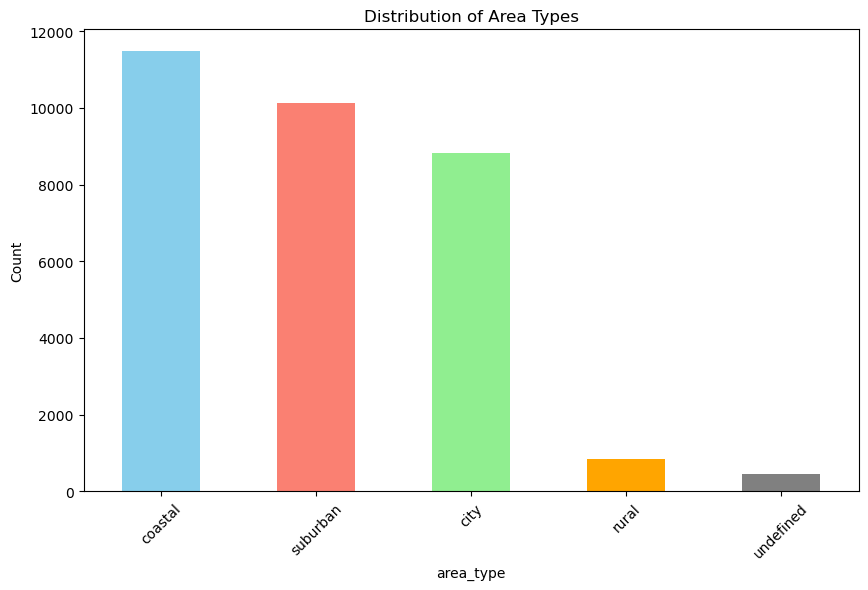

In [42]:
import matplotlib.pyplot as plt

# Plot the distribution of area types
plt.figure(figsize=(10, 6))
area_type_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Area Types')
plt.xlabel('Area Type')
plt.ylabel('Count')
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'grey']
area_type_counts.plot(kind='bar', color=colors)
plt.xticks(rotation=45)
plt.show()

In [44]:
df = pd.read_csv('../data/processedZip_ABCDEats_data.csv')
df

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,dinner_orders,meal_preference,morning_orders,midday_orders,evening_orders,night_orders,drinking_orders,primary_time_period,area_type,region
0,1b8f824d5e,2360,18,2,5,1,0,1,DELIVERY,DIGI,...,2,dinner,0,0,2,0,0,evening,city,"Plymouth County, MA"
1,5d272b9dcb,8670,17,2,2,2,0,1,DISCOUNT,DIGI,...,0,lunch,1,1,0,0,0,morning,suburban,New Jersey
2,f6d1b2ba63,4660,38,1,2,2,0,1,DISCOUNT,CASH,...,0,lunch,1,1,0,0,0,morning,coastal,Coastal Maine
3,180c632ed8,4660,24,2,3,1,0,2,DELIVERY,DIGI,...,0,lunch,0,2,0,0,0,midday,coastal,Coastal Maine
4,4eb37a6705,4660,20,2,5,0,0,2,-,DIGI,...,0,dinner,2,0,0,0,0,morning,coastal,Coastal Maine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31732,f4e366c281,8670,30,1,1,1,34,0,FREEBIE,DIGI,...,0,lunch,0,1,0,0,0,midday,suburban,New Jersey
31733,f6b6709018,8670,27,1,1,0,28,0,DELIVERY,DIGI,...,0,dinner,0,0,1,0,0,evening,suburban,New Jersey
31734,f74ad8ce3f,8670,24,1,1,1,12,0,-,DIGI,...,0,dinner,0,0,0,0,1,drinking,suburban,New Jersey
31735,f7b19c0241,8670,34,1,1,0,7,0,DISCOUNT,DIGI,...,0,lunch,0,1,0,0,0,midday,suburban,New Jersey


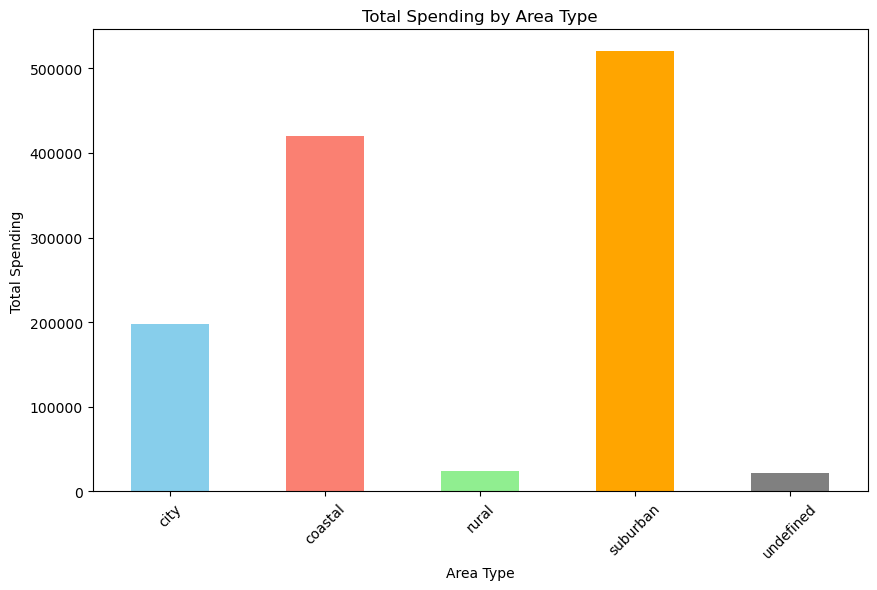

In [49]:
# Calculate total spending by area type
total_spending_by_area = df.groupby('area_type')['total_spending'].sum()

# Plot the total spending by area type
plt.figure(figsize=(10, 6))
total_spending_by_area.plot(kind='bar', color=colors)
plt.title('Total Spending by Area Type')
plt.xlabel('Area Type')
plt.ylabel('Total Spending')
plt.xticks(rotation=45)
plt.show()

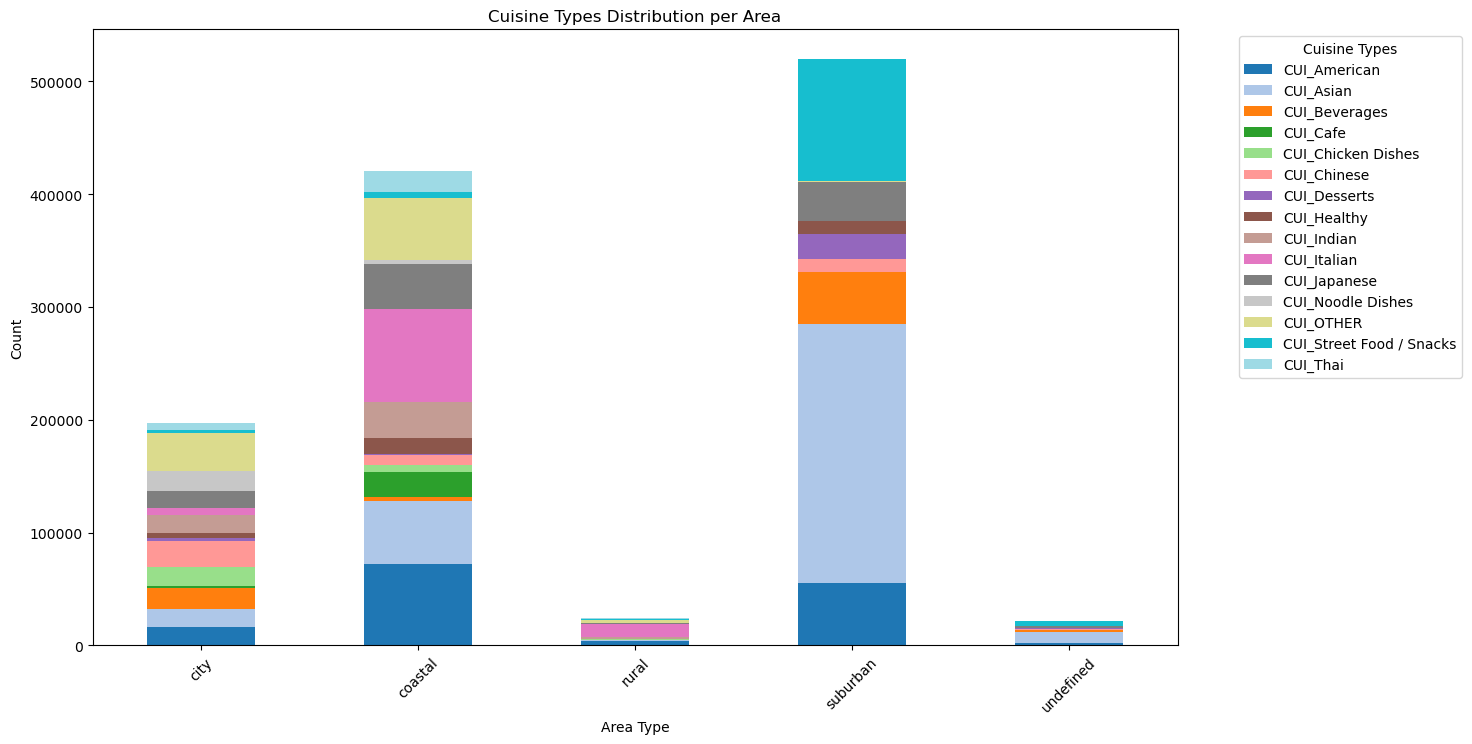

In [50]:
# Calculate the sum of each cuisine type per area
cuisine_columns = [col for col in df.columns if col.startswith('CUI_')]
cuisine_per_area = df.groupby('area_type')[cuisine_columns].sum()

# Plot the cuisine types per area
cuisine_per_area.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')
plt.title('Cuisine Types Distribution per Area')
plt.xlabel('Area Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Cuisine Types', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
plt.xticks(rotation=45)
plt.legend(title='Cuisine Types', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [54]:
# Calculate the sum of orders for each day of the week per area
days_of_week = [f'DOW_{i}' for i in range(7)]
orders_per_day_per_area = df.groupby('area_type')[days_of_week].sum()

# Plot the orders per day per area
# orders_per_day_per_area.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')
# plt.title('Orders per Day of the Week per Area')
# plt.xlabel('Area Type')
# plt.ylabel('Number of Orders')
# plt.xticks(rotation=45)
# plt.legend(title='Day of the Week', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.show()
# Create a table for orders per day of the week per area
orders_per_day_per_area_table = orders_per_day_per_area.reset_index()
orders_per_day_per_area_table

,area_type,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6
0,city,5839,6018,6267,6422,6900,6803,7542
1,coastal,6383,6611,6948,7705,8971,8047,8633
2,rural,298,305,356,363,511,412,498
3,suburban,4982,4959,5067,5033,5020,5326,5547
4,undefined,218,198,198,220,205,225,233
